<a href="https://colab.research.google.com/github/rmarvel23/TwitterProject/blob/main/Borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import chardet
import pandas as pd

def check_encoding(archivo_csv):
    with open(archivo_csv, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']


In [2]:
check_encoding("/content/train.csv")

'Windows-1252'

In [3]:
def read_csv(csv, encoding):
    df = pd.read_csv(csv, encoding=encoding, sep= ",", on_bad_lines='skip')
    return df

In [4]:
df = read_csv('/content/train.csv','Windows-1252' )

In [5]:
class DataError(Exception):
    pass

In [6]:
class DataReviewer:
    """
    A class used to review and analyze a pandas DataFrame, providing various statistical
    summaries and information about the dataset.


    Attributes
    ----------
    df : pandas.DataFrame
        The DataFrame being reviewed.
    data_cleaner : DataCleaner
        An instance of DataCleaner used for cleaning operations on the DataFrame.
    """

    def __init__(self, df):
        """
        Initializes the DataReviewer with the DataFrame to be reviewed.

        Parameters
        ----------
        df : pandas.DataFrame
            The DataFrame to be reviewed.
        """
        self.df = df
        self.data_cleaner = (
          DataCleaner(df))

    def show_sample(self, n=5):
        """
        Returns a random sample of the DataFrame.

        Parameters
        ----------
        n : int, optional
            Number of samples to return, by default 5.

        Returns
        -------
        pandas.DataFrame
            A random sample of the DataFrame.

        Raises
        ------
        DataError
            If there is an error getting the sample.
        """
        try:
            return self.df.sample(n)
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def add_length_category(self):
        """
        Adds a new column 'Tweet Length' based on the length of the 'text' column.

        'short' for tweets with length <= 50 characters,
        'medium' for tweets with length > 50 and <= 100 characters,
        'long' for tweets with length > 100 characters.

        Returns
        -------
        pandas.DataFrame
            The DataFrame with the new 'Tweet Length' column added.

        Raises
        ------
        DataError
            If there is an error adding the new column.
        """
        try:
            self.df["Tweet Length"] = np.where(self.df['text'].str.len() <= 50, 'short',
                                               np.where(self.df['text'].str.len() <= 100, 'medium', 'long'))
            return self.df
        except Exception as e:
            raise DataError(f"Error adding tweet length category: {e}")

    def get_info(self):
        """
        Returns a concise summary of the DataFrame.

        Returns
        -------
        str
            A concise summary of the DataFrame.

        Raises
        ------
        DataError
            If there is an error getting the DataFrame info.
        """
        try:
            return self.df.info()
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def describe(self):
        """
        Generates descriptive statistics of the DataFrame.

        Returns
        -------
        pandas.DataFrame
            Descriptive statistics of the DataFrame.

        Raises
        ------
        DataError
            If there is an error generating the descriptive statistics.
        """
        try:
            return self.df.describe()
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def get_columns(self):
        """
        Returns the column labels of the DataFrame.

        Returns
        -------
        pandas.Index
            The column labels of the DataFrame.

        Raises
        ------
        DataError
            If there is an error getting the columns.
        """
        try:
            return self.df.columns
        except Exception as e:
            raise DataError(f"Error showing sample: {e}")

    def count_rows(self, column):
        """
        Counts non-null values in a specified column of the DataFrame.

        Parameters
        ----------
        column : str
            The column name to count rows for.

        Returns
        -------
        int
            Number of non-null values in the specified column.

        Raises
        ------
        DataError
            If the specified column is not found in the DataFrame or if there is an error
            counting rows.
        """
        try:
            if column in self.df.columns:
                return self.df[column].count()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error counting rows: {e}")

    def get_unique(self, column):
        """
        Returns unique values in a specified column of the DataFrame.

        Parameters
        ----------
        column : str
            The column name to get unique values from.

        Returns
        -------
        numpy.ndarray
            Unique values in the specified column.

        Raises
        ------
        DataError
            If the specified column is not found in the DataFrame or if there is an error
            getting unique values.
        """
        try:
            if column in self.df.columns:
                return self.df[column].unique()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error getting unique values: {e}")

    def check_nulls(self):
        """
        Checks for null values in the DataFrame.

        Returns
        -------
        pandas.Series
        Boolean Series indicating whether each column has null values.

        Raises
        ------
        DataError
            If there is an error checking for null values.
        """
        try:
            return self.df.isnull().any()
        except Exception as e:
            raise DataError(f"Error checking nulls: {e}")

    def get_percentage_nulls(self):
        """
        Calculates the percentage of null values in each column of the DataFrame.

        Returns
        -------
        pandas.Series
            Series containing the percentage of null values for each column.

        Raises
        ------
        DataError
            If there is an error calculating the percentage of null values.
        """
        try:
            return self.df.isnull().sum() / len(self.df) * 100
        except Exception as e:
            raise DataError(f"Error checking nulls percentages: {e}")

    def get_dtypes(self):
        """
        Returns the data types of the columns in the DataFrame.

        Returns
        -------
        pandas.Series
            Series containing the data types of the columns.

        Raises
        ------
        DataError
            If there is an error getting the data types.
        """
        try:
            return self.df.dtypes
        except Exception as e:
            raise DataError(f"Error checking nulls: {e}")

    def add_age_categories(self):
        """
        Adds a new column 'Age Category' based on the 'Age' column.

        'child' for ages in the range '0-20',
        'young adult' for ages in the range '21-30',
        'adult' for ages in the range '31-45' and '46-60',
        'senior' for ages in the range '60-70' and '70-100'.

        Returns
        -------
        pandas.DataFrame
            The DataFrame with the new 'Age Category' column added.

        Raises
        ------
        DataError
            If there is an error adding the new column.
        """
        age_categories = ['child', 'young adult', 'adult', 'senior']
        try:
            self.df['Age Category'] = np.select(
                [
                    self.df['Age of User'].isin(['0-20']),
                    self.df['Age of User'].isin(['21-30']),
                    self.df['Age of User'].isin(['31-45', '46-60']),
                    self.df['Age of User'].isin(['60-70', '70-100'])
                ],
                age_categories,
                default='unknown'  # Default category if age does not match any range
            )
            return self.df
        except Exception as e:
            raise DataError(f"Error adding age categories: {e}")


    def shape(self):
        """
        Returns the shape of the DataFrame.

        Returns
        -------
        tuple
            A tuple representing the dimensions of the DataFrame (rows, columns).

        Raises
        ------
        DataError
            If there is an error getting the shape of the DataFrame.
        """
        try:
            return self.df.shape
        except Exception as e:
            raise DataError(f"Error getting shape: {e}")

    def count_unique(self, column):
        """
        Counts unique values in a specified column of the DataFrame.

        Parameters
        ----------
        column : str
            The column name to count unique values for.

        Returns
        -------
        int
            Number of unique values in the specified column.

        Raises
        ------
        DataError
            If the specified column is not found in the DataFrame or if there is an error
            counting unique values.
        """
        try:
            if column in self.df.columns:
                return self.df[column].nunique()
            else:
                raise DataError(f"Column '{column}' not found in dataset.")
        except Exception as e:
            raise DataError(f"Error counting unique values: {e}")


In [7]:
import numpy as np

In [10]:
reviewer1 = DataReviewer(df)

In [11]:
df = reviewer1.add_age_categories()

In [12]:
df = reviewer1.add_length_category()

In [ ]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²);;;;;;;;;;;;,Age Category,Tweet Length
0,"cb774db0d1,"" I`d have responded, if I were goi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,long
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400,105;;;;;;;;;;;;,young adult,short
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740,18;;;;;;;;;;;;,adult,short
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470,164;;;;;;;;;;;;,adult,short
4,"358bd9e861,"" Sons of ****, why couldn`t they p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,long
...,...,...,...,...,...,...,...,...,...,...,...,...
27432,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540,137;;;;;;;;;;;;,adult,medium
27433,"4f4c4fc327,"" I`ve wondered about rake to. The...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,long
27434,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340,331;;;;;;;;;;;;,senior,long
27435,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160,167;;;;;;;;;;;;,senior,short


In [ ]:
checker = DataReviewer(df)

In [ ]:
checker.get_columns()

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²);;;;;;;;;;;;'],
      dtype='object')

In [9]:

class DataCleaner:
    """
        A class used to clean a pandas DataFrame by dropping unnecessary columns,
        removing rows with null values in specified columns, and renaming columns.

        Attributes
        ----------
        df : pandas.DataFrame
            The DataFrame that is being cleaned.
        """

    def __init__(self, df):
        """
        Initializes the DataCleaner with the DataFrame to be cleaned.

        Parameters
        ----------
        df : pandas.DataFrame
            The DataFrame to be cleaned.
        """
        self.df = df

    def drop_unnecessary_col(self):
        """
        Drops unnecessary columns from the DataFrame.

        The columns that we decided that are unnecessary
        for this project and that will be dropped are:
        - 'textID'
        - 'selected_text'
        - 'Population -2020'
        - 'Land Area (Km²)'
        - 'Density (P/Km²);;;;;;;;;;;;'

        Returns
        -------
        pandas.DataFrame
            The DataFrame with the unnecessary columns removed.

        Raises
        ------
        DataError
            If there is an error dropping the columns.
        """
        unnecessary_columns = ['textID', 'selected_text', 'Population -2020',
                               'Land Area (Km²)', 'Density (P/Km²);;;;;;;;;;;;']
        try:
            self.df = self.df.drop(columns=unnecessary_columns, errors='ignore')
            return self.df
        except KeyError as e:
            raise DataError(f"Error dropping columns: {e}")

    def remove_nulls(self):
        """
        Removes rows with null values in the remaining columns.

        These columns are:
        - 'sentiment'
        - 'Time of Tweet'
        - 'Age of User'
        - 'Country'
        - 'text'

        Returns
        -------
        pandas.DataFrame
            The DataFrame with rows containing null values in specified columns removed.

        Raises
        ------
        DataError
            If there is an error dropping the rows.
        """
        columns_to_check = ["sentiment", "Time of Tweet", "Age of User", "Country", "text"]
        try:
            self.df = self.df.dropna(subset=columns_to_check)
            return self.df
        except KeyError as e:
            raise DataError(f"Error dropping nulls: {e}")

    def rename_col(self):

        """
        Renames specified columns in the DataFrame in order to have
        shorter names.

        The columns renamed are:
        - 'Time of Tweet' to 'Time'
        - 'Age of User' to 'Age'

        Returns
        -------
        pandas.DataFrame
            The DataFrame with the specified columns renamed.

        Raises
        ------
        DataError
            If there is an error renaming the columns.
        """
        try:
            self.df = self.df.rename(columns={"Time of Tweet": "Time", "Age of User": "Age"})
            return self.df
        except KeyError as e:
            raise DataError(f"Error renaming columns: {e}")


In [13]:
cleaned = DataCleaner(df)

In [14]:
df = cleaned.drop_unnecessary_col()

In [15]:
df = cleaned.remove_nulls()

In [16]:
df = cleaned.rename_col()

In [ ]:
df.isnull().sum()

text         0
sentiment    0
Time         0
Age          0
Country      0
dtype: int64

In [17]:
df

,text,sentiment,Time,Age,Country,Age Category,Tweet Length
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,young adult,short
2,my boss is bullying me...,negative,night,31-45,Algeria,adult,short
3,what interview! leave me alone,negative,morning,46-60,Andorra,adult,short
5,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,senior,medium
6,2am feedings for the baby are fun when he is a...,positive,morning,0-20,Argentina,child,medium
...,...,...,...,...,...,...,...
27431,enjoy ur night,positive,noon,21-30,Germany,young adult,short
27432,wish we could come see u on Denver husband l...,negative,night,31-45,Ghana,adult,medium
27434,Yay good for both of you. Enjoy the break - y...,positive,noon,60-70,Grenada,senior,long
27435,But it was worth it ****.,positive,night,70-100,Guatemala,senior,short


In [18]:
class RemoveError(Exception):
    pass

In [19]:
class WrongDataRemover:
    """
    A class used to remove invalid or wrong data from a pandas DataFrame based on specified criteria.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to be cleaned.

    Attributes
    ----------
    df : pandas.DataFrame
        The DataFrame being cleaned.
    """
    def __init__(self, df):
        """
        Initializes the WrongDataRemover with the DataFrame to be cleaned.

        Parameters
        ----------
        df : pandas.DataFrame
            The DataFrame to be cleaned.
        """
        self.df = df

    def remove_wrong_age(self):
        """
        Removes rows with invalid 'Age' values from the DataFrame.

        Valid 'Age' ranges:
        - "0-20"
        - "21-30"
        - "31-45"
        - "46-60"
        - "60-70"
        - "70-100"

        Returns
        -------
        pandas.DataFrame
            The DataFrame with rows containing valid 'Age' values.

        Raises
        ------
        RemoveError
            If there is an error removing rows based on 'Age' values.
        """
        valid_ranges = ["0-20", "21-30", "31-45", "46-60", "60-70", "70-100"]
        try:
            self.df = self.df[self.df['Age'].isin(valid_ranges)]
            return self.df
        except KeyError as e:
            raise RemoveError(f"Error removing wrong ages: {e}")

    def remove_wrong_time(self):
        """
        Removes rows with invalid 'Time' values from the DataFrame.

        Valid 'Time' values:
        - "noon"
        - "night"
        - "morning"

        Returns
        -------
        pandas.DataFrame
            The DataFrame with rows containing valid 'Time' values.

        Raises
        ------
        RemoveError
            If there is an error removing rows based on 'Time' values.
        """
        valid_times = ["noon", "night", "morning"]
        try:
            self.df = self.df[self.df['Time'].isin(valid_times)]
            return self.df
        except KeyError as e:
            raise RemoveError(f"Error removing wrong times: {e}")

    def remove_wrong_countries(self):
        """
        Removes rows with invalid 'Country' values from the DataFrame.

        Valid 'Country' values:
        - List of valid country names.

        Returns
        -------
        pandas.DataFrame
            The DataFrame with rows containing valid 'Country' values.

        Raises
        ------
        RemoveError
            If there is an error removing rows based on 'Country' values.
        """
        valid_countries = ['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
                           'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bhutan',
                           'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Burkina Faso', 'Burundi',
                           "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
                           'China', 'Comoros', 'Croatia', 'Cuba', 'Czechia (Czech Republic)',
                           'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
                           'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
                           'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
                           'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland',
                           'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
                           'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
                           'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mexico',
                           'Micronesia', 'Monaco', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar (formerly Burma)',
                           'Nepal', 'Nicaragua', 'Niger', 'North Korea', 'North Macedonia', 'Norway', 'Pakistan',
                           'Palau', 'Palestine State', 'Panama', 'Papua New Guinea', 'Paraguay', 'Philippines',
                           'Portugal', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
                           'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone',
                           'Singapore', 'Slovenia', 'Somalia', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka',
                           'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand',
                           'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Tuvalu',
                           'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America',
                           'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe',
                           'Afghanistan', 'Angola', 'Azerbaijan', 'Belgium', 'Belize', 'Bolivia', 'Bulgaria', 'Chad',
                           'Chile', 'Costa Rica', 'Cyprus', 'Dominica', 'Egypt', 'France', 'Haiti', 'Iceland',
                           'Jamaica', 'Madagascar', 'Malawi', 'Namibia', 'Nauru', 'Netherlands', 'New Zealand',
                           'Nigeria', 'Oman', 'Poland', 'Qatar', 'Russia', 'Saint Kitts and Nevis', 'San Marino',
                           'Slovakia', 'Solomon Islands', 'South Africa', 'Turkey', 'Vietnam', 'Belarus', 'Colombia',
                           'Congo (Congo-Brazzaville)', 'Guinea', 'Holy See', 'Kazakhstan', 'Moldova', 'Mongolia',
                           'Peru', 'Romania', 'Iran', 'Mauritius', 'Liberia', 'Eswatini (fmr. "Swaziland")']
        try:
            self.df = self.df[self.df['Country'].isin(valid_countries)]
            return self.df
        except KeyError as e:
            raise RemoveError(f"Error removing wrong countries: {e}")

    def change_country_names(self):
        """
        Changes specified country names in the 'Country' column of the DataFrame
        in order to hace shorter names.

        Returns
        -------
        pandas.DataFrame
            The DataFrame with specified country names changed.

        Raises
        ------
        RemoveError
            If there is an error changing country names.
        """
        replace_dict = {
            "Czechia (Czech Republic)": "Czechia",
            "Democratic Republic of the Congo": "R.D. Congo",
            "Myanmar (formerly Burma)": "Myanmar",
            "Congo (Congo-Brazzaville)": "Congo-Brazzaville",
            'Eswatini (fmr. "Swaziland")': "Eswatini"
        }
        try:
            self.df['Country'] = self.df['Country'].replace(replace_dict)
            return self.df
        except KeyError as e:
            raise RemoveError(f"Error changing country names: {e}")

    def remove_wrong_sentiment(self):
        """
        Removes rows with invalid 'sentiment' values from the DataFrame.

        Valid 'sentiment' values:
        - "positive"
        - "negative"
        - "neutral"

        Returns
        -------
        pandas.DataFrame
            The DataFrame with rows containing valid 'sentiment' values.

        Raises
        ------
        RemoveError
            If there is an error removing rows based on 'sentiment' values.
        """
        valid_sentiments = ["positive", "negative", "neutral"]
        try:
            self.df = self.df[self.df['sentiment'].isin(valid_sentiments)]
            return self.df
        except KeyError as e:
            raise RemoveError(f"Error removing wrong sentiments: {e}")



In [20]:
remover = WrongDataRemover(df)

In [21]:
df = remover.remove_wrong_age()

In [22]:
df = remover.remove_wrong_countries()

In [23]:
df = remover.remove_wrong_sentiment()

In [24]:
df = remover.remove_wrong_time()

In [25]:
df = remover.change_country_names()

In [ ]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'China', 'Comoros', 'Croatia', 'Cuba', 'Czechia', 'R.D. Congo',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Liechtenstein',
       'Lithu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20887 entries, 1 to 27436
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          20887 non-null  object
 1   sentiment     20887 non-null  object
 2   Time          20887 non-null  object
 3   Age           20887 non-null  object
 4   Country       20887 non-null  object
 5   Age Category  20887 non-null  object
 6   Tweet Length  20887 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [26]:
df

,text,sentiment,Time,Age,Country,Age Category,Tweet Length
1,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,young adult,short
2,my boss is bullying me...,negative,night,31-45,Algeria,adult,short
3,what interview! leave me alone,negative,morning,46-60,Andorra,adult,short
5,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,senior,medium
6,2am feedings for the baby are fun when he is a...,positive,morning,0-20,Argentina,child,medium
...,...,...,...,...,...,...,...
27431,enjoy ur night,positive,noon,21-30,Germany,young adult,short
27432,wish we could come see u on Denver husband l...,negative,night,31-45,Ghana,adult,medium
27434,Yay good for both of you. Enjoy the break - y...,positive,noon,60-70,Grenada,senior,long
27435,But it was worth it ****.,positive,night,70-100,Guatemala,senior,short


In [27]:
class VisualizationError(Exception):
    pass

In [28]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import seaborn as sns



class DataVisualizer(ABC):
    """
    Abstract base class for data visualization and calculation.

    Attributes:
    ----------
    df (DataFrame): The DataFrame containing the data to visualize.
    """
    def __init__(self, df):
        """
        Initializes a Data Visualizer object

        Parameters
        ----------
        df (DataFrame): The DataFrame containing the data to visualize.
        """
        self.df = df

    @abstractmethod
    def get_positive(self, *param):
        """
        Abstract method to get visualization related to positive sentiment.

        Parameters
        ----------
        *param: Variable-length argument list.

        """
        pass

    @abstractmethod
    def get_negative(self, *param):
        """
        Abstract method to get visualization related to negative sentiment.

        Parameters
        ----------
        *param: Variable-length argument list.

        """
        pass

    @abstractmethod
    def get_sentiment(self, *param):
        """
        Abstract method to compare info by sentiment.

        Parameters
        ----------
        *param: Variable-length argument list.

        """
        pass


class CountryAnalyzer(DataVisualizer):
    """
    Subclass of DataVisualizer for analyzing sentiment by country.

    Parameters:
    -------
    df: pandas.DataFrame
        The DataFrame to be analyzed.

    Attributes:
    -------
    available_countries (list): List of available country names for analysis.
    """
    available_countries = ['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
                           'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas',
                           'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bhutan',
                           'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
                           'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
                           'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
                           'China', 'Comoros', 'Croatia', 'Cuba', 'Denmark', 'Djibouti',
                           'Dominican Republic', 'Ecuador', 'El Salvador',
                           'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
                           'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
                           'Greece', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana',
                           'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland',
                           'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kiribati',
                           'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
                           'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
                           'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania',
                           'Mexico', 'Micronesia', 'Monaco', 'Montenegro', 'Morocco',
                           'Mozambique', 'Nepal', 'Nicaragua', 'Niger', 'North Korea',
                           'North Macedonia', 'Norway', 'Pakistan', 'Palau',
                           'Palestine State', 'Panama', 'Papua New Guinea', 'Paraguay',
                           'Philippines', 'Portugal', 'Rwanda', 'Saint Lucia',
                           'Saint Vincent and the Grenadines', 'Samoa',
                           'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                           'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'Somalia',
                           'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
                           'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan',
                           'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                           'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Tuvalu',
                           'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                           'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
                           'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe', 'Afghanistan',
                           'Angola', 'Azerbaijan', 'Belgium', 'Belize', 'Bolivia', 'Bulgaria',
                           'Chad', 'Chile', 'Costa Rica', 'Cyprus', 'Dominica', 'Egypt',
                           'France', 'Haiti', 'Iceland', 'Jamaica', 'Madagascar', 'Malawi',
                           'Namibia', 'Nauru', 'Netherlands', 'New Zealand', 'Nigeria',
                           'Oman', 'Poland', 'Qatar', 'Russia', 'Saint Kitts and Nevis',
                           'San Marino', 'Slovakia', 'Solomon Islands', 'South Africa',
                           'Turkey', 'Vietnam', 'Belarus', 'Colombia', 'Guinea', 'Holy See',
                           'Kazakhstan', 'Moldova', 'Mongolia', 'Peru', 'Romania', 'Iran',
                           'Mauritius', 'Liberia', 'Eswatini']

    def __init__(self, df):
        """
        Initializes a CountryAnalyzer object.

        Parameters:
        -------
        df: pandas.DataFrame
            The DataFrame to be analyzed.
        """

        super().__init__(df)

    def get_positive(self, country):
        """
        Retrieves and displays the number of positive tweets for a given country.

        Parameters
        ----------
        country : str
            The name of te country to analyze

        Returns
        -------
        result: str
            The number of positive tweets in chosen country

        """
        while country not in self.available_countries:
            country = input(
                f"Country not available. The available list is: {self.available_countries}, please try again: ")
        try:
            result = self.df[(self.df['Country'] == country) & (self.df['sentiment'] == "positive")].shape[0]
            print(f"The are {result} results with positive tweets in {country}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {country}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing positive sentiment for {country}: {e}")

    def get_negative(self, country):
        """
        Retrieves and displays the number of negative tweets for a given country.

        Parameters
        ----------
        country : str
            The name of te country to analyze

        Returns
        -------
        result: str
            The number of positive tweets in chosen country

        """
        while country not in self.available_countries:
            country = input(
                f"Country not available. The available list is: {self.available_countries}, please try again: ")
        try:
            result = self.df[(self.df['Country'] == country) & (self.df['sentiment'] == "negative")].shape[0]
            print(f"The are {result} results with negative tweets in {country}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {country}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing negative sentiment for {country}: {e}")

    def get_sentiment(self, country):
        """
        Visualize sentiment distribution for a specific country.

        Parameters
        ----------
        country: str
            The name of the country to analyze.

        Returns
        -------
        A pie chart showing sentiment distribution

        """
        while country not in self.available_countries:
            country = input(
                f"Country not available. The available list is: {self.available_countries}, please try again: ")
        try:
            sentiment_counts = self.df[self.df['Country'] == country].groupby('sentiment').size()
            plt.figure(figsize=(8, 8))
            plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Tweets by people from {country}')
            plt.axis('equal')
            plt.show()
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {country}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error plotting sentiment for {country}: {e}")

    def compare_sentiment(self, sentiment="negative"):
        """
        Compare sentiment distribution across different countries.

        Parameters
        ----------
        sentiment (str, optional)
            The sentiment type to compare (default is "negative")

        Returns
        -------
        Shows a bar chart of sentiment distribution across countries.

        """
        try:
            tweets_by_country = self.df[self.df['sentiment'] == sentiment]['Country'].value_counts()
            top_countries = tweets_by_country.head(20).sort_values(ascending=False)
            plt.figure(figsize=(10, 8))

            palette = sns.color_palette("tab20", len(top_countries))

            plt.bar(top_countries.index, top_countries.values, color=palette)
            plt.title(f'Top 20 countries with {sentiment} tweets')
            plt.xticks(rotation=45, ha='right', fontsize=7)
            plt.show()
        except VisualizationError as e:
            print(f"VisualizationError: {e}. Make sure 'sentiment' and 'Country' columns exist in the DataFrame.")


class AgeAnalyzer(DataVisualizer):
    """
    Subclass of DataVisualizer for analyzing sentiment by age.

    Parameters:
    -------
    df: pandas.DataFrame
        The DataFrame to be analyzed.

    Attributes:
    -------
    available_ages (list): List of available country ages for analysis.
    """
    available_ages = ['21-30', '31-45', '46-60', '70-100', '0-20', '60-70']

    def __init__(self, df):
        """
        Initializes a AgeAnalyzer object.

        Parameters:
        -------
        df: pandas.DataFrame
            The DataFrame to be analyzed.
        """
        super().__init__(df)

    def get_positive(self, age):
        """
            Retrieves and displays the number of positive tweets for a given age range.

            Parameters
            ----------
            age : str
                The age range to analyze

            Returns
            -------
            result: str
                The number of positive tweets in chosen age range

                """
        while age not in self.available_ages:
            age = input(f"Age range not available. Available ages are {self.available_ages}. Try again.")
        try:
            result = self.df[(self.df['Age'] == age) & (self.df['sentiment'] == "positive")].shape[0]
            print(f"The are {result} results with positive tweets with {age} years old")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {age} age: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing positive sentiment for {age} age: {e}")

    def get_negative(self, age):
        """
        Retrieves and displays the number of negative tweets for a given age range.

        Parameters
        ----------
        age range : str
            The age range to analyze

        Returns
        -------
        result: str
            The number of positive tweets in chosen age range

        """
        while age not in self.available_ages:
            age = input(f"Age range not available. Available ages are {self.available_ages}. Try again.")

        try:
            result = self.df[(self.df['Age'] == age) & (self.df['sentiment'] == "negative")].shape[0]
            print(f"The are {result} results with negative tweets with {age} years old")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {age} age: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing positive sentiment for {age} age: {e}")

    def get_sentiment(self, age):
        """
        Visualize sentiment distribution for a specific age range.

        Parameters
        ----------
        age: str
            The age range to analyze.

        Returns
        -------
        A pie chart showing sentiment distribution

        """

        while age not in self.available_ages:
            age = input(f"Age range not available. Available ages are {self.available_ages}. Try again.")

        try:
            sentiment_counts = self.df[self.df['Age'] == age].groupby('sentiment').size()
            plt.figure(figsize=(8, 8))
            plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Tweets by people of {age} years old')
            plt.axis('equal')
            plt.show()
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {age} years: {e}")
        except Exception as e:
            raise VisualizationError(f"Error plotting sentiment for {age} years: {e}")

    def compare_sentiment(self, sentiment="negative"):
        """
        Compare sentiment distribution across different ages.

        Parameters
        ----------
        sentiment(str, optional)
            The sentiment type to compare(default is negative)

        Returns
        -------
        Displays a bar chart comparing sentiment distribution across different ages.

        """
        try:
            tweets_by_age = self.df[self.df['sentiment'] == sentiment]['Age'].value_counts()
            top_ages = tweets_by_age.head(20).sort_values(ascending=False)
            plt.figure(figsize=(10, 8))

            palette = sns.color_palette("tab20", len(top_ages))

            plt.bar(top_ages.index, top_ages.values, color=palette)
            plt.title(f'Top ages with {sentiment} tweets')
            plt.xticks(rotation=45, ha='right', fontsize=7)

            plt.show()
        except VisualizationError as e:
            print(f"KeyError: {e}. Make sure 'sentiment' and 'Age' columns exist in the DataFrame.")


class TimeAnalyzer(DataVisualizer):
    """
    Subclass of DataVisualizer for analyzing sentiment by time.

    Parameters:
    -------
    df: pandas.DataFrame
        The DataFrame to be analyzed.

    Attributes:
    -------
    available_times (list): List of available country times for analysis.
    """
    available_times = ['noon', 'night', 'morning']

    def __init__(self, df):
        """
        Initialize TimeAnalyzer with a DataFrame.

        Parameters:
        -----------
        df : pandas.DataFrame
            The DataFrame containing the data for time analysis.
        """
        super().__init__(df)

    def get_positive(self, time):
        """
        Retrieves and displays the number of positive tweets for a given time.

        Parameters
        ----------
        time : str
            The time to analyze

        Returns
        -------
        result: str
            The number of positive tweets in chosen time"""

        while time not in self.available_times:
            time = input(f"Time of tweet not available. Available times are {self.available_times}. Try again.")
        try:
            result = self.df[(self.df['Time'] == time) & (self.df['sentiment'] == "positive")].shape[0]
            print(f"The are {result} results with positive tweets during {time}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {time}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing positive sentiment for {time}: {e}")

    def get_negative(self, time):
        """
        Retrieves and displays the number of negative tweets for a given time.

        Parameters
        ----------
        time : str
            The time to analyze

        Returns
        -------
        result: str
        The number of negative tweets in chosen time

                """
        while time not in self.available_times:
            time = input(f"Time of tweet not available. Available times are {self.available_times}. Try again.")
        try:
            result = self.df[(self.df['Time'] == time) & (self.df['sentiment'] == "negative")].shape[0]
            print(f"The are {result} results with negative tweets during {time}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {time}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing negative sentiment for {time}: {e}")

    def get_sentiment(self, time):
        """
        Visualize sentiment distribution for a specific time.

        Parameters
        ----------
        time: str
            The time to analyze.

        Returns
        -------
        Displays a pie chart showing sentiment distribution for the chosen time.

        """
        while time not in self.available_times:
            time = input(f"Time of tweet not available. Available times are {self.available_times}. Try again.")
        try:
            sentiment_counts = self.df[self.df['Time'] == time].groupby('sentiment').size()
            plt.figure(figsize=(8, 8))
            plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Tweets by people in {time}')
            plt.axis('equal')
            plt.show()
        except KeyError as e:
            raise VisualizationError(f"Error accessing data for {time}: {e}")
        except Exception as e:
            raise VisualizationError(f"Error plotting sentiment for {time}: {e}")

    def compare_sentiment(self, sentiment="negative"):
        """
        Compare sentiment distribution across different times.

        Parameters
        ----------
        sentiment(str, optional)
            The sentiment type to compare (default is "negative")

        Returns
        -------
        Displays a bar chart comparing sentiment distribution across different times.

        """
        try:
            tweets_by_time = self.df[self.df['sentiment'] == sentiment]['Time'].value_counts()
            top_times = tweets_by_time.sort_values(ascending=False)
            plt.figure(figsize=(10, 8))

            palette = sns.color_palette("tab20", len(top_times))
            plt.bar(top_times.index, top_times.values, color=palette)
            plt.title(f'{sentiment} tweets in different times ')
            plt.xticks(rotation=45, ha='right', fontsize=7)

            plt.show()
        except VisualizationError as e:
            print(f"KeyError: {e}. Make sure 'sentiment' and 'Time' columns exist in the DataFrame.")


class LengthAnalyzer(DataVisualizer):
    """
    Subclass of DataVisualizer for analyzing sentiment by Tweet Length.

    Parameters:
    -------
    df: pandas.DataFrame
        The DataFrame to be analyzed.

    """

    def __init__(self, df):
        """
        Initialize LengthAnalyzer with a DataFrame.

        Parameters:
        -----------
        df : pandas.DataFrame
            The DataFrame containing the data for length analysis.
        """
        super().__init__(df)

    def get_positive(self):
        """
        Calculates and displays the average length of positive tweets.

        Returns
        -------
        Mean: int
            Displays the average length of positive tweets.

        """

        try:
            positive_tweets = self.df[self.df['sentiment'] == "positive"]
            positive_lengths = positive_tweets['text'].apply(len)
            mean_length = positive_lengths.mean()
            result = round(mean_length)
            print(f"The mean length of positive tweets is {result}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data: {e}")
        except Exception as e:
            raise VisualizationError(f"Error calculating mean length of positive tweets: {e}")

    def get_negative(self):
        """
        Calculates and displays the average length of negative tweets.

        Returns
        -------
        Mean: int
            Displays the average length of negative tweets.

        """
        try:
            negative_tweets = self.df[self.df['sentiment'] == "negative"]
            negative_lengths = negative_tweets['text'].apply(len)
            mean_length = negative_lengths.mean()
            result = round(mean_length)
            print(f"The mean length of negative tweets is {result}")
        except KeyError as e:
            raise VisualizationError(f"Error accessing data: {e}")
        except Exception as e:
            raise VisualizationError(f"Error calculating mean length of negative tweets: {e}")

    def get_sentiment(self):
        """
        Visualizes the average tweet length for different sentiments.

        Returns
        -------
        Displays a bar chart showing the average tweet length for positive,
        negative and neutral tweets.

        """
        try:
            sentiments = ["positive", "negative", "neutral"]
            mean_lengths = []

            for sentiment in sentiments:
                tweet_lengths = self.df[self.df['sentiment'] == sentiment]['text'].apply(len)
                mean_length = tweet_lengths.mean()
                mean_lengths.append(mean_length)

            plt.figure(figsize=(10, 6))
            plt.bar(sentiments, mean_lengths, color=['green', 'red', 'blue'])
            plt.xlabel('Sentiment')
            plt.ylabel('Average Tweet Length')
            plt.title('Average Tweet Length by Sentiment')
            plt.show()
        except KeyError as e:
            raise VisualizationError(f"Error accessing data: {e}")
        except Exception as e:
            raise VisualizationError(f"Error plotting tweet length by sentiment: {e}")


class SpecificDataAnalyzer(DataVisualizer):
    """
    Subclass of DataVisualizer for analyzing sentiment and get specific
    data about who wrote the negative, neutral and positive tweets analyzed.

    Parameters:
    -------
    df: pandas.DataFrame
        The DataFrame to be analyzed.

      """
    def __init__(self, df):
        """
        Initialize SpecificDataAnalyzer with a DataFrame

        Parameters
        ----------
        df: pandas.DataFrame
            The DataFrame containing the data for specific data analysis.
        """
        super().__init__(df)

    def get_negative(self):
        """
        Finds and displays information related to the most negative tweets.

        Returns
        -------
        Displays the country, age category, time and tweet length most
        repeated in negative tweets.

        """
        try:
            negative_tweets = self.df[self.df['sentiment'] == 'negative']
            most_negative_info = negative_tweets.groupby(
                ['Country', 'Age Category', 'Time', 'Tweet Length']).size().idxmax()
            print(most_negative_info)

        except KeyError as e:
            raise VisualizationError(f"Error accessing data for most negative tweets: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing most negative tweets: {e}")

    def get_positive(self):
        """
        Finds and displays information related to the most positive tweets.

        Returns
        -------
        Displays the country, age category, time and tweet length most
        repeated in positive tweets.
        """
        try:
            positive_tweets = self.df[self.df['sentiment'] == 'positive']
            most_positive_info = positive_tweets.groupby(
                ['Country', 'Age Category', 'Time', 'Tweet Length']).size().idxmax()
            print(most_positive_info)

        except KeyError as e:
            raise VisualizationError(f"Error accessing data for most positive tweets: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing most positive tweets: {e}")

    def get_sentiment(self):
        """
        Retrieves and displays the most frequent sentiment information (negative,
        positive and neutral) by country, age category, time and tweet legth.

        Returns
        -------
        Prints the top 10 records of most frequent sentiment information for negative, positive, and neutral sentiments.

        """
        try:
            negative_tweets = self.df[self.df['sentiment'] == 'negative']
            negative_counts = negative_tweets.groupby(['Country', 'Age Category', 'Time', "Tweet Length"]).size()
            top_negative_info = negative_counts.nlargest(10).reset_index()
            top_negative_info.columns = ['Country', 'Age', 'Time', 'Length', 'Count Negative']

            positive_tweets = self.df[self.df['sentiment'] == 'positive']
            positive_counts = positive_tweets.groupby(['Country', 'Age Category', 'Time', 'Tweet Length']).size()
            top_positive_info = positive_counts.nlargest(10).reset_index()
            top_positive_info.columns = ['Country', 'Age', 'Time', 'Length', 'Count Positive']

            neutral_tweets = self.df[self.df['sentiment'] == 'neutral']
            neutral_counts = neutral_tweets.groupby(['Country', 'Age Category', 'Time', 'Tweet Length']).size()
            top_neutral_info = neutral_counts.nlargest(10).reset_index()
            top_neutral_info.columns = ['Country', 'Age', 'Time', 'Length', 'Count Neutral']

            print("Negative information: ")
            print(top_negative_info.to_string(index=False))

            print("\nPositive information: ")
            print(top_positive_info.to_string(index=False))

            print("\nNeutral information: ")
            print(top_neutral_info.to_string(index=False))

        except KeyError as e:
            raise VisualizationError(f"Error accessing data for sentiment analysis: {e}")
        except Exception as e:
            raise VisualizationError(f"Error processing sentiment analysis: {e}")


In [29]:
ej = SpecificDataAnalyzer(df)

In [30]:
ej.get_negative()

('Nauru', 'child', 'morning', 'short')


In [31]:
ej.get_positive()

('Croatia', 'senior', 'night', 'medium')


In [32]:
ej.get_sentiment()

Negative information: 
    Country         Age    Time Length  Count Negative
      Nauru       child morning  short              16
     Bhutan young adult    noon medium              15
      Egypt       adult morning medium              15
El Salvador      senior    noon medium              15
     Greece       child morning medium              15
     Angola      senior    noon medium              14
     Cyprus young adult    noon medium              13
       Fiji      senior    noon medium              13
      India      senior   night  short              13
   Kiribati      senior   night  short              13

Positive information: 
     Country         Age    Time Length  Count Positive
     Croatia      senior   night medium              16
     Czechia       adult   night medium              16
    Djibouti      senior   night medium              15
   Argentina       child morning medium              14
     Armenia young adult    noon  short              14
Burkina Faso

In [33]:
import seaborn as sns

In [34]:
ej = CountryAnalyzer(df)

In [37]:
ej.get_positive("France")

The are 36 results with positive tweets in France


In [38]:
ej2 = AgeAnalyzer(df)

Age range not available. Available ages are ['21-30', '31-45', '46-60', '70-100', '0-20', '60-70']. Try again.60-70


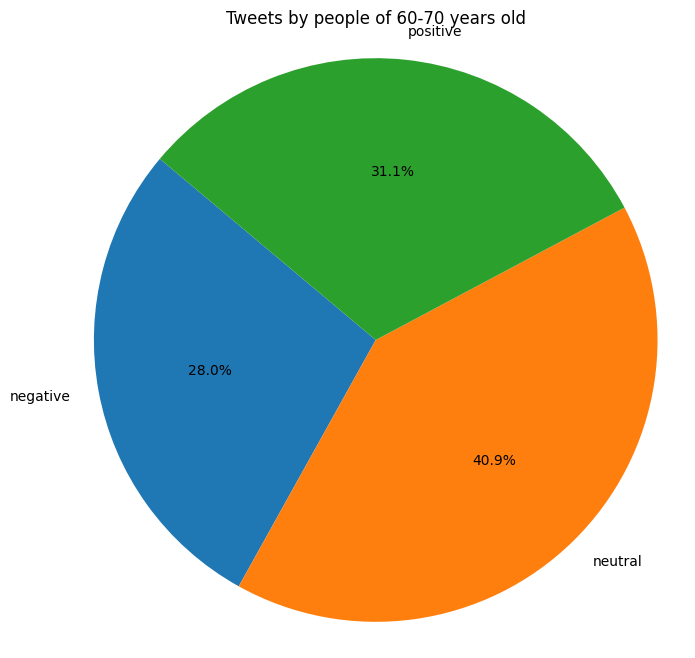

In [43]:
ej2.get_sentiment("20-31")

In [44]:
ej3 = TimeAnalyzer(df)

Time of tweet not available. Available times are ['noon', 'night', 'morning']. Try again.morning


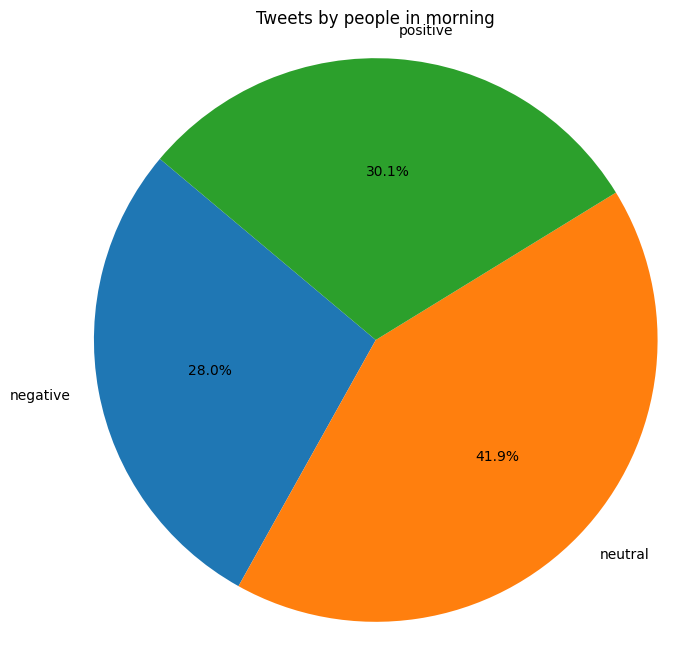

In [47]:
ej3.get_sentiment("mornnn")

In [48]:
ej4 = LengthAnalyzer(df)

In [51]:
ej4.compare_sentiment()

AttributeError: 'LengthAnalyzer' object has no attribute 'compare_sentiment'

In [104]:
class TokenizeError(Exception):
    pass

In [102]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def tokenize_text(text):
    return word_tokenize(text.lower())

def tokenize_text_negative(dataset):
     try:
        negative_tweets = dataset.loc[dataset['sentiment'] == 'negative']
        negative_tweets.loc['text'] = negative_tweets['text'].astype(str)
        negative_tweets.loc['tokens'] = negative_tweets['text'].apply(tokenize_text)
        negative_words = [word for tokens in negative_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(negative_words)
        return bag_of_words
     except Exception as e:
        raise TokenizeError(f"Error creating bag of words for negative tweets: {e}")

def tokenize_text_positive(dataset):
     try:
        positive_tweets = dataset.loc[dataset['sentiment'] == 'positive']
        positive_tweets.loc['text'] = positive_tweets['text'].astype(str)
        positive_tweets.loc['tokens'] = positive_tweets['text'].apply(tokenize_text)
        positive_words = [word for tokens in positive_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(positive_words)
        return bag_of_words
     except Exception as e:
        raise TokenizeError(f"Error creating bag of words for positive tweets: {e}")


def tokenize_text_neutral(dataset):
    try:
        neutral_tweets = dataset.loc[dataset['sentiment'] == 'neutral']
        neutral_tweets.loc['text'] = neutral_tweets['text'].astype(str)
        neutral_tweets.loc['tokens'] = neutral_tweets['text'].apply(tokenize_text)
        neutral_words = [word for tokens in neutral_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(neutral_words)
        return bag_of_words
    except Exception as e:
        raise TokenizeError(f"Error creating bag of words for neutral tweets: {e}")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
def tokenize_tweets(dataset, sentiment):
    try:
        filtered_tweets = dataset.loc[dataset['sentiment'] == sentiment].copy()
        filtered_tweets['text'] = filtered_tweets['text'].astype(str)
        filtered_tweets['tokens'] = filtered_tweets['text'].apply(tokenize_text)
        words = [word for tokens in filtered_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(words)
        return bag_of_words
    except Exception as e:
        raise TokenizeError(f"Error creating bag of words for {sentiment} tweets: {e}")

In [109]:
pos = tokenize_tweets(df, "positive")

In [112]:
cleaned = words_filtered(pos)

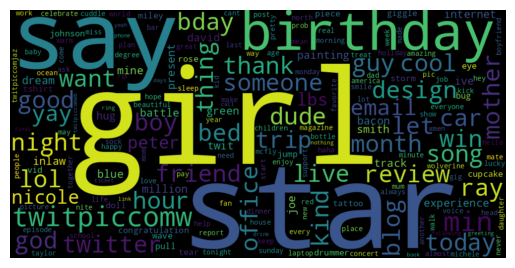

In [114]:
get_wordcloud(cleaned)

In [86]:
tokenize_text_negative(df)

<ipython-input-84-0af82c60b482>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)


Counter({'sooo': 33,
         'sad': 312,
         'i': 4105,
         'will': 158,
         'miss': 346,
         'you': 731,
         'here': 132,
         'in': 776,
         'san': 5,
         'diego': 4,
         '!': 3181,
         'my': 1528,
         'boss': 5,
         'is': 1007,
         'bullying': 1,
         'me': 759,
         '...': 1051,
         'what': 223,
         'interview': 4,
         'leave': 40,
         'alone': 26,
         'sharpie': 1,
         'running': 20,
         'dangerously': 1,
         'low': 10,
         'on': 585,
         'ink': 1,
         'want': 186,
         'to': 2078,
         'go': 298,
         'music': 27,
         'tonight': 98,
         'but': 430,
         'lost': 78,
         'voice': 15,
         '.': 3135,
         'back': 152,
         'home': 149,
         'now': 367,
         'gon': 120,
         'na': 192,
         'every': 17,
         'one': 202,
         '`': 2531,
         'm': 639,
         'sorry': 223,
         'the':

In [87]:
import re
def words_filtered(words):
    nm_words = ["her", "there", "back", "will", "still", "has", "what", "when", "time",
                "about", "know", "feel", "too", "don", "your", "much", "think",
                "this", "like", "with", "out", "even", "did", "them", "hrs", "one",
                "get", "got", "day", "give", "for", "from"]
    cleaned_words = []

    for w in words:
        w = w.lower()
        w = re.sub(r'[^a-z]', '', w)
        if w in stopwords.words("english"):
            continue
        elif w in nm_words:
            continue
        elif len(w) < 3:
            continue
        elif re.match(r'^https?', w) or re.match(r'^www',w) or re.match(r'^apps', w):
            continue
        else:
            cleaned_words.append(w)
    return cleaned_words

In [80]:
neg = words_filtered(neg)

In [81]:
neg

['sooo',
 'sad',
 'miss',
 'san',
 'diego',
 'boss',
 'bullying',
 'interview',
 'leave',
 'alone',
 'sharpie',
 'running',
 'dangerously',
 'low',
 'ink',
 'want',
 'music',
 'tonight',
 'lost',
 'voice',
 'home',
 'gon',
 'every',
 'sorry',
 'way',
 'malaysia',
 'internet',
 'access',
 'twit',
 'went',
 'sleep',
 'power',
 'cut',
 'noida',
 'working',
 'consolation',
 'bmi',
 'tested',
 'hahaha',
 'says',
 'obesed',
 'well',
 'unhappy',
 'minutes',
 'born',
 'raised',
 'nyc',
 'living',
 'texas',
 'past',
 'years',
 'soooooo',
 'sleeeeepy',
 'last',
 'school',
 'today',
 'sniffle',
 'egh',
 'blah',
 'boooooooooooo',
 'dunno',
 'wan',
 'work',
 'hangovers',
 'suckkkkkk',
 'drunk',
 'mess',
 'case',
 'new',
 'week',
 'thrilled',
 'mine',
 'dissappointed',
 'days',
 'torn',
 'ace',
 'hearts',
 'hunchback',
 'easily',
 'mannnn',
 'iphone',
 'jealous',
 'bitlyngnar',
 'tired',
 'sick',
 'flu',
 'thing',
 'bby',
 'wish',
 'going',
 'tomorrow',
 'make',
 'good',
 'waiting',
 'sleeping',
 'p

In [78]:
from nltk.probability import FreqDist
def get_most_freq(bag_of_words, n=200):
    most_frequent = FreqDist(bag_of_words)
    return most_frequent.most_common(n)


In [79]:
get_most_freq(en)

[('i', 4105),
 ('!', 3181),
 ('.', 3135),
 ('`', 2531),
 ('to', 2078),
 ('*', 1814),
 ('the', 1722),
 ('my', 1528),
 ('a', 1263),
 ('it', 1125),
 ('and', 1108),
 ('...', 1051),
 ('is', 1007),
 ('t', 877),
 ('?', 826),
 ('in', 776),
 ('me', 759),
 ('you', 731),
 ('that', 731),
 ('so', 707),
 ('of', 641),
 ('s', 640),
 ('m', 639),
 ('for', 597),
 ('on', 585),
 ('not', 573),
 ('have', 552),
 ('just', 481),
 ('but', 430),
 ('..', 425),
 ('at', 422),
 (':', 412),
 ('this', 407),
 ('be', 387),
 ('can', 387),
 ('no', 378),
 ('now', 367),
 ('like', 354),
 ('with', 349),
 ('miss', 346),
 ('up', 343),
 ('was', 321),
 ('work', 321),
 ('sad', 312),
 ('all', 310),
 ('out', 309),
 ('get', 301),
 ('go', 298),
 ('im', 264),
 ('do', 261),
 ('day', 260),
 ('got', 258),
 ('too', 250),
 ('are', 243),
 ('going', 241),
 ('don', 238),
 ('am', 237),
 ('today', 237),
 ('really', 234),
 ('what', 223),
 ('sorry', 223),
 ('bad', 219),
 ('about', 203),
 ('one', 202),
 ('feel', 201),
 ('hate', 195),
 ('http', 193),

In [94]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def get_wordcloud(words):
    words_join = " ".join(words)
    wordcloud = WordCloud(width= 1000, height = 500, relative_scaling = 0.5).generate(words_join)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [96]:
import wordcloud

print(wordcloud.__version__)

1.9.3


In [91]:
negwords = tokenize_text_negative(df)

<ipython-input-84-0af82c60b482>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)


In [92]:
cleaned_neg = words_filtered(negwords)

In [101]:
pos = tokenize_text_positive(df)

<ipython-input-84-0af82c60b482>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['text'] = positive_tweets['text'].astype(str)
<ipython-input-84-0af82c60b482>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['tokens'] = positive_tweets['text'].apply(tokenize_text)


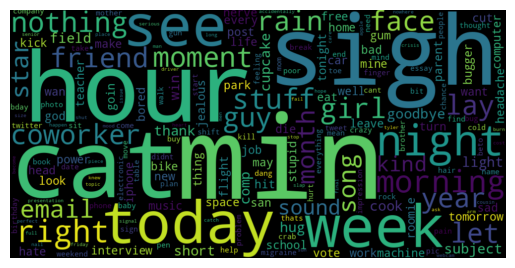

In [95]:
get_wordcloud(cleaned_neg)

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


In [259]:
def process_tweets(dataset):
    try:
        all_words = []
        labels = []

        for index, row in dataset.iterrows():
            text = row['text']
            sentiment = row['sentiment']
            if isinstance(text, str):
                tokens = word_tokenize(text)
                cleaned_words = words_filtered(tokens)
                all_words.extend(cleaned_words)
                if sentiment == 'positive':
                    labels.extend([1] * len(cleaned_words))
                elif sentiment == 'negative':
                    labels.extend([0] * len(cleaned_words))
                elif sentiment == 'neutral':
                    labels.extend([2] * len(cleaned_words))

        return all_words, labels

    except Exception as e:
        print(f"Error processing tweets: {e}")


def train_and_evaluate_classifier(all_words, labels):
    X_train, X_test, y_train, y_test = train_test_split(all_words, labels, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ])

    param_grid = {
        'vect__max_features': [1000, 5000, None],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.1, 0.5, 1.0, 2.0],
        'clf__fit_prior': [True, False]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_pipeline = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best parameters: {best_params}")
    print(f"Accuracy: {accuracy}")

    return best_pipeline, best_params



def train_model(best_pipeline, X_train, y_train):
    y_train = np.array(y_train)
    best_pipeline.fit(X_train, y_train)
    return best_pipeline


def predict_sentiment(text, best_pipeline):

    text_features = best_pipeline.named_steps['vect'].transform([text]).toarray()
    prediction = best_pipeline.named_steps['clf'].predict(text_features)

    if prediction == 1:
        return "Positive"
    elif prediction == 2:
        return "Neutral"
    else:
        return "Negative"


In [256]:
process_tweets(df)

(['sooo',
  'sad',
  'miss',
  'san',
  'diego',
  'boss',
  'bullying',
  'interview',
  'leave',
  'alone',
  'shameless',
  'plugging',
  'best',
  'rangers',
  'forum',
  'earth',
  'feedings',
  'baby',
  'fun',
  'smiles',
  'coos',
  'soooo',
  'high',
  'journey',
  'wow',
  'became',
  'cooler',
  'hehe',
  'possible',
  'really',
  'really',
  'song',
  'love',
  'story',
  'taylor',
  'swift',
  'sharpie',
  'running',
  'dangerously',
  'low',
  'ink',
  'want',
  'music',
  'tonight',
  'lost',
  'voice',
  'test',
  'test',
  'env',
  'home',
  'gon',
  'miss',
  'every',
  'hes',
  'playing',
  'ghost',
  'online',
  'really',
  'interesting',
  'new',
  'updates',
  'kirin',
  'pet',
  'metamorph',
  'third',
  'job',
  'wait',
  'dragon',
  'pet',
  'cleaning',
  'house',
  'family',
  'comming',
  'later',
  'today',
  'restart',
  'computer',
  'thought',
  'win',
  'supposed',
  'put',
  'end',
  'constant',
  'rebootiness',
  'see',
  'wat',
  'mean',
  'bout',
  '

In [246]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [248]:
from sklearn.svm import LinearSVC

In [260]:
train_and_evaluate_classifier(all_words, labels)

Best parameters: {'clf__alpha': 0.5, 'clf__fit_prior': True, 'vect__max_features': 5000, 'vect__min_df': 1}
Accuracy: 0.47048308150670354


(Pipeline(steps=[('vect',
                  CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                 ('clf', MultinomialNB(alpha=0.5))]),
 {'clf__alpha': 0.5,
  'clf__fit_prior': True,
  'vect__max_features': 5000,
  'vect__min_df': 1})

In [262]:
train_model(best_pipeline, X_train, y_train)

NameError: name 'best_pipeline' is not defined

In [223]:
text = "mot ok"

In [224]:
predict_sentiment(text, best_pipeline)

'Neutral'

In [117]:
def process_tweets(dataset):
    try:
        all_words = []
        labels = []

        for index, row in dataset.iterrows():
            text = row['text']
            sentiment = row['sentiment']
            if isinstance(text, str):
                tokens = word_tokenize(text)
                cleaned_words = words_filtered(tokens)
                all_words.extend(cleaned_words)
                if sentiment == 'positive':
                    labels.extend([1] * len(cleaned_words))
                elif sentiment == 'negative':
                    labels.extend([0] * len(cleaned_words))
                elif sentiment == 'neutral':
                    labels.extend([2] * len(cleaned_words))

        return all_words, labels

    except Exception as e:
        print(f"Error processing tweets: {e}")

In [118]:
all_words, labels = process_tweets(df)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(all_words, labels, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Probar unigramas y bigramas
    'vectorizer__max_features': [1000, 5000, None],  # Limitar el número máximo de features
    'vectorizer__min_df': [1, 2, 5]
}

clf = MultinomialNB()

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {best_params}")
print(f"Accuracy: {accuracy}")


ValueError: Invalid parameter 'vectorizer' for estimator MultinomialNB(alpha=0.1). Valid parameters are: ['alpha', 'class_prior', 'fit_prior', 'force_alpha'].

In [115]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(all_words, labels, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

NameError: name 'train_test_split' is not defined

In [124]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def train_model(X_train, y_train):
    param_grid = {
        'alpha': [0.1, 0.5, 1.0, 2.0],
        'fit_prior': [True, False]
    }

    clf = MultinomialNB()

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_clf, best_params

def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [127]:
clf, best_params = train_model(X_train, y_train)

In [128]:
clf,best_params

(MultinomialNB(alpha=2.0), {'alpha': 2.0, 'fit_prior': True})

In [129]:
evaluate_model(clf,X_test,y_test)

0.4728240051074697

In [134]:
X_test

<23495x17140 sparse matrix of type '<class 'numpy.int64'>'
	with 20720 stored elements in Compressed Sparse Row format>

In [120]:
import numpy as np

y_train = np.array(y_train)

clf.fit(X_train, y_train)

def predict_sentiment(text):

    text_features = vectorizer.transform([text]).toarray()


    prediction = clf.predict(text_features)


    if prediction == 1:
        return "Positive"
    elif prediction == 2:
        return "Neutral"
    else:
        return "Negative"

In [123]:
texto="Not bad, is fine"
sentiment = predict_sentiment(texto)
print(sentiment)

Neutral


Utilizar más groupby, si queremos añadir una tabla manual con concat
IDEAS: usar np.where para crear una columna nueva: edad, convertir sentimiento a binario, longitud de tweet

In [139]:
from gensim.models import Word2Vec


ValueError: invalid literal for int() with base 10: 'version'

In [177]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

# Descargar stopwords y punkt si no lo has hecho aún
nltk.download('punkt')
nltk.download('stopwords')

def process_tweets_for_word2vec(dataset):
    try:
        corpus = []
        for index, row in dataset.iterrows():
            text = row['text']
            if isinstance(text, str):
                tokens = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
                cleaned_tokens = words_filtered(tokens)
                corpus.append(cleaned_tokens)

        return corpus

    except Exception as e:
        print(f"Error processing tweets for Word2Vec: {e}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
processed_corpus = process_tweets_for_word2vec(df)

In [178]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=processed_corpus, vector_size=110, window=5, min_count=10, workers=4, epochs=10)

In [186]:
vector1 = model.wv['hate']

In [187]:
vector2 =model.wv['love']

In [188]:
similarity = model.wv.similarity('hate', 'love')
print(f"Similitud entre 'hate' y 'love': {similarity}")

Similitud entre 'hate' y 'love': 0.18125036358833313


In [182]:
similar_words = model.wv.most_similar("swift")
print(similar_words)

[('opening', 0.996527910232544), ('wet', 0.9961088299751282), ('healthy', 0.9960812926292419), ('blue', 0.9957704544067383), ('proud', 0.9957089424133301), ('misses', 0.9956285953521729), ('score', 0.9955844879150391), ('sign', 0.9953939914703369), ('plan', 0.995255708694458), ('teacher', 0.9952491521835327)]


In [261]:
import gensim
print(gensim.__version__)

4.3.2
